In [4]:
import os
import geopandas as gpd
import glob
import pandas as pd
# Path to the three folders
shapefile_dir = r"D:\Projects\Hackathon\Agentic Hackathon\geospatial\geofencing\shapefiles"
folders = [
    os.path.join(shapefile_dir, "WDPA_WDOECM_Jul2025_Public_marine_shp_0"),
    os.path.join(shapefile_dir, "WDPA_WDOECM_Jul2025_Public_marine_shp_1"),
    os.path.join(shapefile_dir, "WDPA_WDOECM_Jul2025_Public_marine_shp_2")
]

# Load and merge all polygon shapefiles
all_gdfs = []
for folder in folders:
    shp_path = glob.glob(os.path.join(folder, "*-polygons.shp"))
    if shp_path:
        gdf = gpd.read_file(shp_path[0])
        all_gdfs.append(gdf)
        print(f"✅ Loaded: {shp_path[0]}")

# Concatenate into one GeoDataFrame
merged_gdf = gpd.GeoDataFrame(pd.concat(all_gdfs, ignore_index=True), crs=all_gdfs[0].crs)

# Save merged file
output_dir = os.path.join(shapefile_dir, "mpa_zones")
os.makedirs(output_dir, exist_ok=True)
merged_path = os.path.join(output_dir, "mpa_merged.shp")
merged_gdf.to_file(merged_path)

print(f"\n🎉 Merged MPA shapefile saved to: {merged_path}")


✅ Loaded: D:\Projects\Hackathon\Agentic Hackathon\geospatial\geofencing\shapefiles\WDPA_WDOECM_Jul2025_Public_marine_shp_0\WDPA_WDOECM_Jul2025_Public_marine_shp-polygons.shp
✅ Loaded: D:\Projects\Hackathon\Agentic Hackathon\geospatial\geofencing\shapefiles\WDPA_WDOECM_Jul2025_Public_marine_shp_1\WDPA_WDOECM_Jul2025_Public_marine_shp-polygons.shp
✅ Loaded: D:\Projects\Hackathon\Agentic Hackathon\geospatial\geofencing\shapefiles\WDPA_WDOECM_Jul2025_Public_marine_shp_2\WDPA_WDOECM_Jul2025_Public_marine_shp-polygons.shp


d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555510252 of field WDPAID of feature 6648 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555510273 of field WDPAID of feature 6649 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555510365 of field WDPAID of feature 6650 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555510628 of field WDPAID of feature 6651 not successfully written. Possibly due to too larger number with respect to f


🎉 Merged MPA shapefile saved to: D:\Projects\Hackathon\Agentic Hackathon\geospatial\geofencing\shapefiles\mpa_zones\mpa_merged.shp


C:\Users\altaf\AppData\Local\Temp\ipykernel_51676\632612897.py:15: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


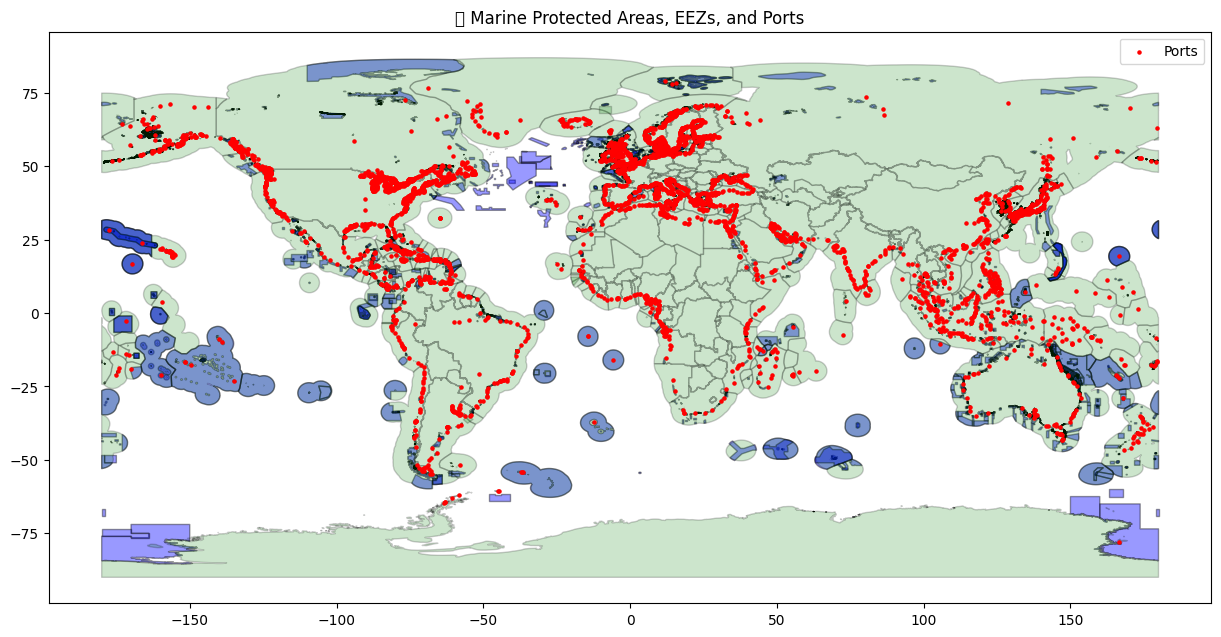

In [ ]:
# Cell: Load and Visualize Shapefiles
import geopandas as gpd
import matplotlib.pyplot as plt

# Load all zones
mpa = gpd.read_file("mpa_zones")
eez = gpd.read_file("eez_zones")
ports = gpd.read_file("ports")

# Plot all zones
fig, ax = plt.subplots(figsize=(15, 10))
mpa.plot(ax=ax, color='blue', alpha=0.4, edgecolor='k', label='MPA')
eez.plot(ax=ax, color='green', alpha=0.2, edgecolor='black', label='EEZ')
ports.plot(ax=ax, color='red', markersize=5, label='Ports')
plt.legend()
plt.title("🌍 Marine Protected Areas, EEZs, and Ports")
plt.show()


In [1]:
import os
from pathlib import Path

# Navigate back to your project root
os.chdir(Path.cwd().parents[2])
print("✅ Current working directory:", os.getcwd())


✅ Current working directory: d:\Projects\Hackathon\Agentic Hackathon


In [2]:
from geospatial.geofencing.fence_utils import load_zone_shapefiles, assign_zone
import pandas as pd

# ✅ Load your shapefiles (MPA, EEZ, Ports)
zones = load_zone_shapefiles()

# ✅ Example: Simulate model output DataFrame with required columns
# In your actual case, replace this with real model predictions
df = pd.DataFrame({
    'longitude': [73.5, 78.9],
    'latitude': [15.4, 12.7],
    'behavior': ['fishing', 'non-fishing']
})

df = assign_zone(df, zones['mpa'], 'in_mpa', lon_col="longitude", lat_col="latitude")
df['illegal_fishing'] = (df['in_mpa']) & (df['behavior'] == 'fishing')
df.head()



,longitude,latitude,behavior,in_mpa,illegal_fishing
0,73.5,15.4,fishing,False,False
1,78.9,12.7,non-fishing,False,False


In [ ]:
from geospatial.geofencing.fence_utils import load_zone_shapefiles, assign_zone
import pandas as pd

# ✅ Load shapefiles
zones = load_zone_shapefiles()

# ✅ Simulated vessel predictions
df = pd.DataFrame({
    'longitude': [73.5, 78.9],
    'latitude': [15.4, 12.7],
    'behavior': ['fishing', 'non-fishing']
})

# ✅ Assign all zones
df = assign_zone(df, zones['mpa'], 'in_mpa', lon_col="longitude", lat_col="latitude")
df = assign_zone(df, zones['eez'], 'in_eez', lon_col="longitude", lat_col="latitude")
df = assign_zone(df, zones['ports'], 'near_port', lon_col="longitude", lat_col="latitude")

# ✅ Mark illegal fishing
df['illegal_fishing'] = (df['in_mpa']) & (df['behavior'] == 'fishing')

df.head()

,longitude,latitude,behavior,in_mpa,in_eez,near_port,illegal_fishing
0,73.5,15.4,fishing,False,True,False,False
1,78.9,12.7,non-fishing,False,True,False,False


In [7]:
from geospatial.zone_violation_detector.detect_violation import detect_illegal_behavior

import pandas as pd

df = pd.DataFrame({
    'longitude': [73.5, 78.9],
    'latitude': [15.4, 12.7],
    'behavior': ['fishing', 'non-fishing']
})

result = detect_illegal_behavior(df)
print(result[['longitude', 'latitude', 'behavior', 'in_mpa', 'illegal_fishing']])


   longitude  latitude     behavior  in_mpa  illegal_fishing
0       73.5      15.4      fishing   False            False
1       78.9      12.7  non-fishing   False            False
